__CART기반 알고리즘__

DecisionTree, RandomForest, GBM, XGBoost, LightGBM

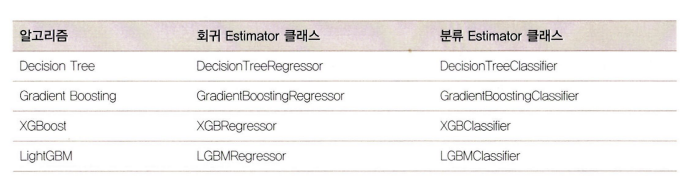

## Regression Tree

__데이터의 균일도를 기반으로 트리생성__

예시: 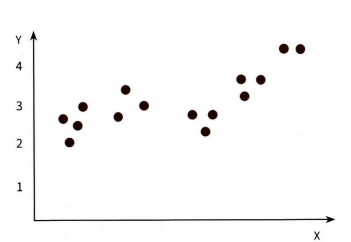

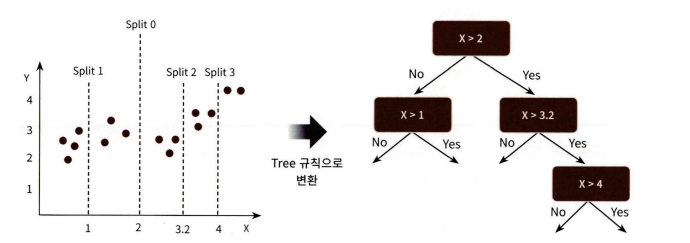

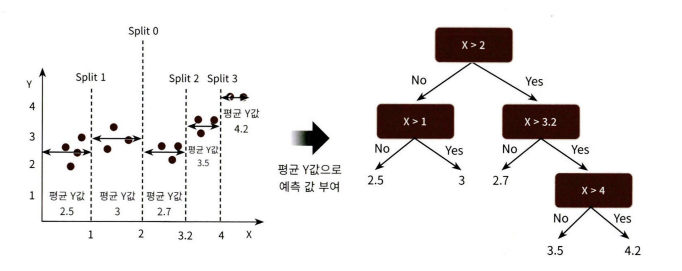



In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

bostondf = pd.read_excel(r'C:\Users\hanjieun_2\Desktop\개인공부\algorithms\1.ML\1.Supervised_Learning\2.Estimation\datasets\bostonhousingprice.xls')
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [5]:
bostondf.drop('CAT. MEDV', axis=1, inplace=True)
X = bostondf.drop('MEDV', axis=1)
y = bostondf['MEDV']

### RandomForest Regressor

In [6]:
rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 교차 검증의 개별 Negative MSE scores:', np.round(neg_mse_scores,2))
print('5 교차 검증의 개별 RMSE scores:', np.round(rmse_scores,2))
print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 교차 검증의 개별 Negative MSE scores: [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 RMSE scores: [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE : 4.423


### DecisionTree Regressor,<br>
### GBM, XGBoost, LightGBM Regressor

In [7]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('####', model.__class__.__name__, '####')
    print('5 교차 검증의 평균 RMSE:{0:.3f}'.format(avg_rmse))

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg , gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X, y)

#### DecisionTreeRegressor ####
5 교차 검증의 평균 RMSE:5.978
#### RandomForestRegressor ####
5 교차 검증의 평균 RMSE:4.423
#### GradientBoostingRegressor ####
5 교차 검증의 평균 RMSE:4.269
#### XGBRegressor ####
5 교차 검증의 평균 RMSE:4.959
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 996
[LightGBM] [Info] Number of data points in the train set: 404, number of used features: 13
[LightGBM] [Info] Start training from score 22.566089
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

### RandomForestRegressor를 활용한 feature_importance 시각화

<Axes: >

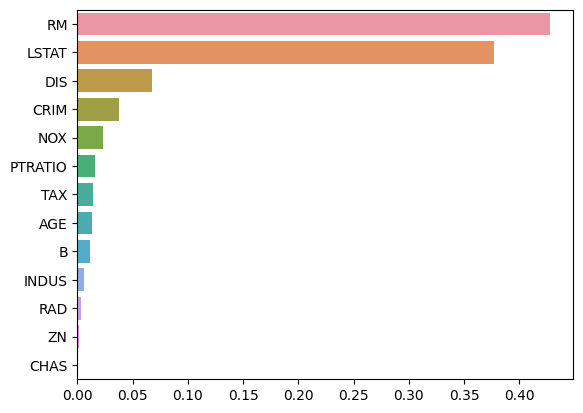

In [9]:
import seaborn as sb

rf_reg = RandomForestRegressor(n_estimators=1000)

rf_reg.fit(X, y)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X.columns)
feature_series = feature_series.sort_values(ascending=False)
sb.barplot(x=feature_series, y=feature_series.index)

### DecisionTree Regressor의 max_depth를 변화시켜보기

(100, 2)


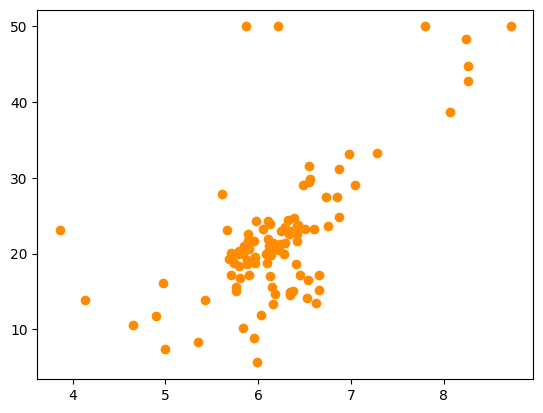

In [10]:
# 2차원 평면상 회귀 예측선을 표현하기 위해 독립변수 RM(=종속변수에 가장 많은 영향력을 끼치는 변수)만 추출
import matplotlib.pyplot as plt

bostondf_sample = bostondf[['RM', 'MEDV']]
bostondf_sample = bostondf_sample.sample(n=100, random_state=0)
print(bostondf_sample.shape)

plt.figure()
plt.scatter(bostondf_sample.RM, bostondf_sample.MEDV, c='darkorange')

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형회귀와 결정트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2,7
lr_reg = LinearRegression()

dt_reg2 = DecisionTreeRegressor(max_depth=2)
dt_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 테스트 세트를 4.5~8.5까지의 100개 데이터 세트로 생성
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)

# 보스턴 주택 가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 MEDV 추출
X_feature = bostondf_sample['RM'].values.reshape(-1,1)
y_target = bostondf_sample['MEDV'].values.reshape(-1,1)

# 학습과 예측 수행
lr_reg.fit(X_feature, y_target)
dt_reg2.fit(X_feature, y_target)
dt_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_dt2 = dt_reg2.predict(X_test)
pred_dt7 = dt_reg7.predict(X_test)


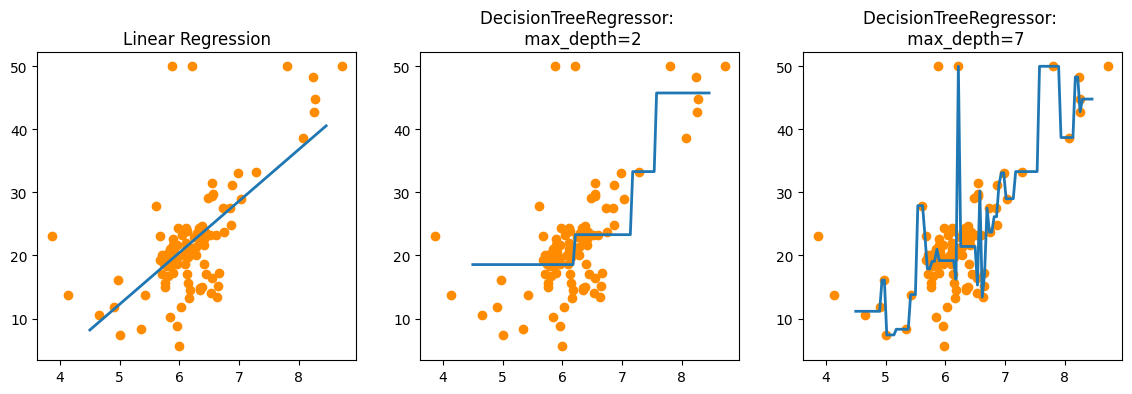

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X 축 값을 4.5~8.5로 변환하며 입력했을 때 선형회귀와 결정트리 회귀 예측선 시각화
# 선형 회귀로 학습되 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostondf_sample.RM, bostondf_sample.MEDV, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('DecisionTreeRegressor: \n max_depth=2')
ax2.scatter(bostondf_sample.RM, bostondf_sample.MEDV, c='darkorange')
ax2.plot(X_test, pred_dt2, label='max_depth:2', linewidth=2)

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('DecisionTreeRegressor: \n max_depth=7')
ax3.scatter(bostondf_sample.RM, bostondf_sample.MEDV, c='darkorange')
ax3.plot(X_test, pred_dt7, label='max_depth:7', linewidth=2)


> 선형 회귀는 직선으로 예측 회귀선을 표현하는 데 반해, 회귀트리의 경우 분할되는 데이터 지점에 따라 브랜치를 만들면서 계단 형태로 회귀선을 만든다. DecisionTree Regressor max_depth=7인 경우 학습 데이터 세트의 이상치 데이터도 학습하면서 복잡한 계단 형태의 회귀선을 만들어 과적합이 되기 쉬운 모델이 되었음을 알 수 있다. 